## 简单线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

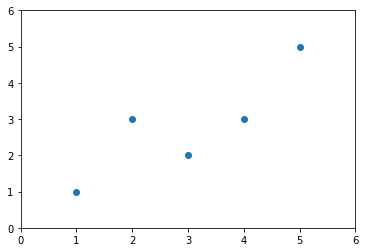

In [2]:
x = np.array([1,2,3,4,5])
y = np.array([1,3,2,3,5])
plt.scatter(x,y)
plt.axis([0,6,0,6])
plt.show()

### 推到a,b参数公式

![jupyter](简单线性回归.png)

In [3]:
x_mean = np.mean(x)
y_mean = np.mean(y)
num = 0.0 #分子
d = 0.0 #分母
for x_i,y_i in zip(x,y):
    num += (x_i - x_mean)*(y_i - y_mean)
    d += (x_i - x_mean)**2

In [4]:
a = num/d
b = y_mean - a*x_mean
y_hat = a*x+b ##绘制的直线方程

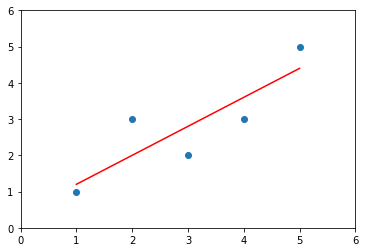

In [5]:
plt.scatter(x,y)
plt.plot(x,y_hat,color='r')
plt.axis([0,6,0,6])
plt.show()

In [6]:
x_predict = 6 ##预测值
y_predict = a*x_predict+b
y_predict

5.2

In [7]:
type(y_hat)

numpy.ndarray

In [35]:
class SimpleLinearRegression1:
    def __init__(self):
        self.a = None
        self.b = None
    
    def fit(self,x_train,y_train):
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        num = 0.0
        d = 0.0
        for x,y in zip(x_train,y_train):
            num += (x - x_mean)*(y - y_mean)
            d += (x - x_mean)**2
        self.a = num/d
        self.b = y_mean - self.a*x_mean
        
        return self
    def predict(self,x_single):
        y = self.a*x_single+self.b
        return y       
    
    def predict1(self,x_predict):
        return np.array([self.predict(x) for x in x_predict])

In [36]:
reg = SimpleLinearRegression1()
reg.fit(x,y)

In [37]:
reg.predict(x_predict)

19.606223789186046

In [38]:
reg.a

8.268557322426979

In [39]:
reg.b

-30.005120145375827

In [40]:
%run SimpleLinearRegression0

### 向量化实现性能测试

In [14]:
import numpy as np
m = 100000
big_x =np.random.random(size=m)
big_y = big_x*2+3.0+np.random.normal(size=m)

In [50]:
# %load SimpleLinearRegression0
class SimpleLinearRegression0:
    def __init__(self):
        self.a = None
        self.b = None
    
    def fit(self,x_train,y_train):
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        
        ##向量法
        num = (x_train-x_mean).dot(y_train-y_mean)
        d = (x_train-x_mean).dot(x_train-x_mean)
        self.a = num/d
        self.b = y_mean - self.a*x_mean
        
        return self
    def predict(self,x_single):
        y = self.a*x_single+self.b
        return y       
    
    def predict1(self,x_predict):
        return np.array([self.predict(x) for x in x_predict])

In [51]:
reg2 = SimpleLinearRegression0()

In [52]:
%timeit reg.fit(big_x,big_y)
%timeit reg2.fit(big_x,big_y)

270 ms ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 4.56 times longer than the fastest. This could mean that an intermediate result is being cached.
12.9 ms ± 6.39 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 衡量线性回归方法的指标    
MSE    
RMSE    
MAE

In [61]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [62]:
boston = datasets.load_boston()

In [63]:
#print(boston.DESCR)

In [64]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [65]:
x = boston.data[:,5]
x.shape

(506,)

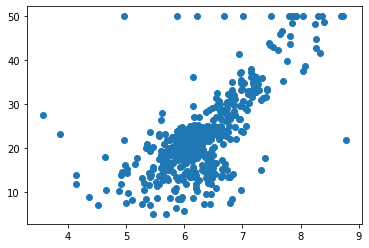

In [66]:
y = boston.target
plt.scatter(x,y)
plt.show()

In [67]:
np.max(y)

50.0

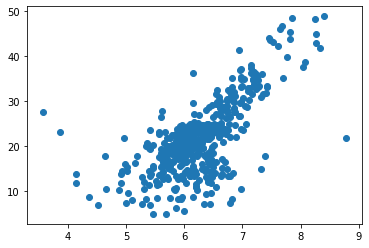

In [68]:
x = x[y<50]
y = y[y<50]
plt.scatter(x,y)
plt.show()

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.2,random_state=666)

In [70]:
x_train.shape

(392,)

In [71]:
x_test.shape

(98,)

In [72]:
reg = SimpleLinearRegression1()

In [73]:
reg.fit(x_train,y_train)

In [74]:
reg.a

7.8608543562689634

In [75]:
reg.b

-27.459342806705592

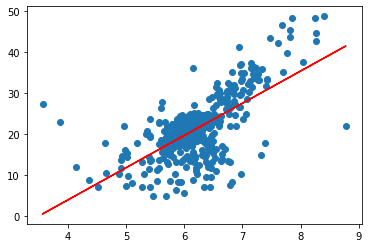

In [76]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color='r')
plt.show()

In [77]:
y_predict= reg.predict(x_test)

In [78]:
y_predict

array([23.09381156, 23.14883754, 19.20268865, 29.02089574, 25.6014241 ,
        5.06887252, 24.66598243, 26.47397893, 15.52380881, 28.38416654,
       17.29250104, 13.0633614 , 23.99780981, 21.37228445, 23.29033292,
       21.66313607, 21.22292822, 19.94946982, 22.41777808, 25.17693796,
       19.51712283, 24.14716604, 24.57165218, 19.07691498, 23.14097668,
       28.78507011, 20.46042535, 18.18863844, 15.93257324, 29.46110359,
       31.65428195, 19.36776659, 16.77368466, 38.07659996, 19.72936589,
       20.99496345, 18.27510784, 24.22577459, 21.67099692, 22.7086297 ,
       21.22292822, 19.17910609, 15.41375685, 19.41493172, 16.5771633 ,
       23.13311583, 23.71481905, 30.13713706, 17.99211708, 24.69742585,
       19.43065343, 25.4284853 , 22.71649055, 16.53785903, 19.13194096,
       18.82536764, 22.15836989, 18.55809859, 25.03544258, 29.52399042,
       18.75461995, 19.69006162, 18.59740287, 14.58836714, 18.81750679,
       24.65812158, 20.83774636, 19.77653102, 27.88893272, 19.32

![jupyter](MSE.png)

In [79]:
mse_test = np.sum((y_predict-y_test)**2)/len(y_test)

In [80]:
mse_test

24.156602134387427

![jupyter](RMSE.png)

In [81]:
from math import sqrt
rmse_test = sqrt(mse_test)
rmse_test

4.914936635846634

![jupyter](MAE.png)

In [82]:
mae_test = np.sum(np.abs(y_predict-y_test))/len(y_test)
mae_test

3.5430974409463865

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [84]:
mean_squared_error(y_test,y_predict)

24.156602134387427

In [85]:
mean_absolute_error(y_test,y_predict)

3.5430974409463865

## scikit-learn实现

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [87]:
X=X[y<50]
y=y[y<50]

### 划分数据集

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_tset=train_test_split(X,y,test_size=0.2,random_state=666)

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [91]:
lin_reg.coef_

array([-1.20354261e-01,  3.64423279e-02, -3.61493155e-02,  5.12978140e-02,
       -1.15775825e+01,  3.42740062e+00, -2.32311760e-02, -1.19487594e+00,
        2.60101728e-01, -1.40219119e-02, -8.35430488e-01,  7.80472852e-03,
       -3.80923751e-01])

In [92]:
lin_reg.intercept_

34.11739972322984

In [93]:
np.argsort(lin_reg.coef_)

array([ 4,  7, 10, 12,  0,  2,  6,  9, 11,  1,  3,  8,  5], dtype=int32)

In [94]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [95]:
boston.feature_names[np.argsort(lin_reg.coef_)]

array(['NOX', 'DIS', 'PTRATIO', 'LSTAT', 'CRIM', 'INDUS', 'AGE', 'TAX',
       'B', 'ZN', 'CHAS', 'RAD', 'RM'], dtype='<U7')

## R Square

In [96]:
1-mean_squared_error(y_test,y_predict)/np.var(y_test)

0.6129316803937324

### 逻辑回归    
sigmoid函数

In [97]:
import numpy as np
import matplotlib.pyplot as plt

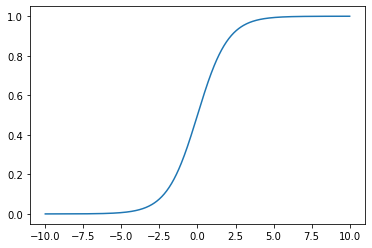

In [98]:
def sigmod(t):
    return 1/(1+np.exp(-t))

x = np.linspace(-10,10,500)
y = sigmod(x)
plt.plot(x,y)
plt.show()

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target
X = X[y<2,:2]
y = y[y<2]

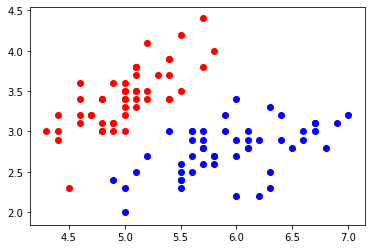

In [102]:
plt.scatter(X[y==0,0],X[y==0,1],color='r')
plt.scatter(X[y==1,0],X[y==1,1],color='blue')
plt.show()

In [103]:
np.random.seed(666)
X = np.random.normal(0,1,size=(200,2))
y = np.array(X[:,0]**2+X[:,1]<1.5,dtype='int')

In [104]:
for x in range(20):
    y[np.random.randint(200)]=1

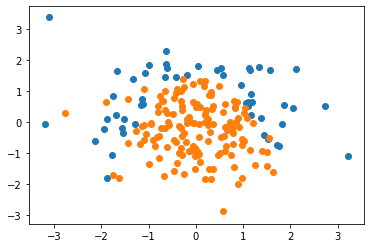

In [105]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

### 使用scikit-learn中的逻辑回归


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [107]:
log_reg = LogisticRegression()

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=666)

In [111]:
log_reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [112]:
log_reg.score(X_train,y_train)

0.7933333333333333

In [113]:
log_reg.score(X_test,y_test)

0.86